In [15]:
import pandas as pd
data = pd.read_csv('sephora_website_dataset.csv')

In [17]:
data.head(3)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [23]:
data.isnull().sum()

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64

In [25]:
brand_rating = data.groupby('brand')['rating'].mean().sort_values(ascending=False)
print(brand_rating)

brand
Montblanc           5.000000
Aether Beauty       5.000000
Four Sigmatic       5.000000
Fable & Mane        5.000000
Golde               4.875000
                      ...   
8Greens             2.833333
Capri Blue          2.593750
Eight & Bob         2.333333
Overose             2.125000
PLAY! by SEPHORA    2.000000
Name: rating, Length: 324, dtype: float64


In [27]:
correlation_rating_price = data[['rating', 'price']].corr()
print(correlation_rating_price)

          rating     price
rating  1.000000  0.019559
price   0.019559  1.000000


In [33]:
top_brands = data.groupby('brand')['number_of_reviews'].sum().sort_values(ascending=False).head(10)
print(top_brands)

brand
SEPHORA COLLECTION         121095
Too Faced                   88405
Urban Decay                 87273
Benefit Cosmetics           87237
KVD Vegan Beauty            86103
CLINIQUE                    85435
tarte                       80230
Anastasia Beverly Hills     77497
NARS                        68949
bareMinerals                66063
Name: number_of_reviews, dtype: int64


In [29]:
online_dist = data['online_only'].value_counts(normalize=True) * 100
print(online_dist)

online_only
0    76.516143
1    23.483857
Name: proportion, dtype: float64


In [35]:
online_stats = data.groupby('online_only')[['price', 'rating']].mean()
print(online_stats)

                 price    rating
online_only                     
0            46.999745  4.058874
1            60.044844  3.765676


In [37]:
marketing_flags = data.groupby('online_only')[['limited_edition', 'exclusive']].mean()
print(marketing_flags)

             limited_edition  exclusive
online_only                            
0                   0.076265   0.283678
1                   0.142592   0.202973


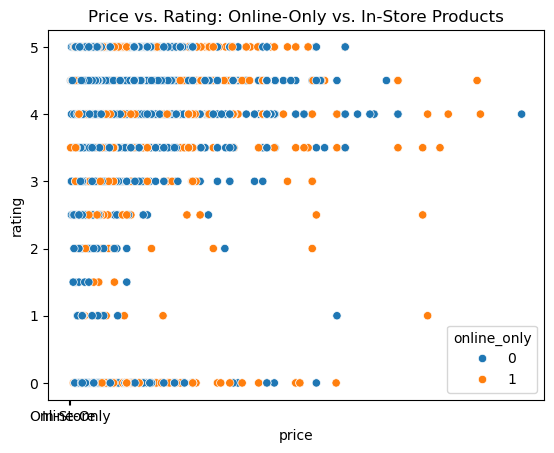

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='price', y='rating', hue='online_only', data=data)
plt.title('Price vs. Rating: Online-Only vs. In-Store Products')
plt.xticks([0, 1], ['In-Store', 'Online-Only'])
plt.show()

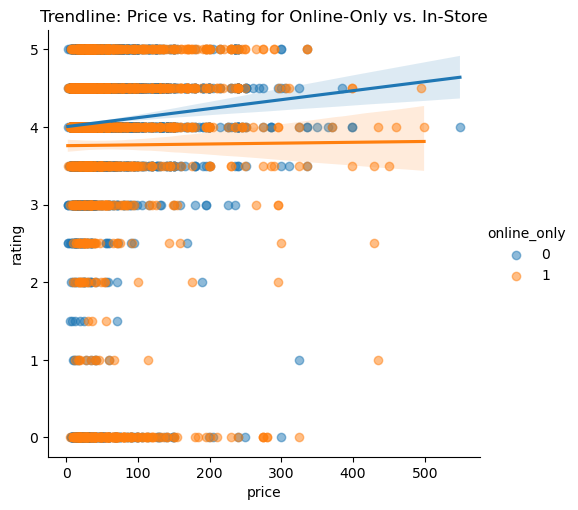

In [43]:
sns.lmplot(x='price', y='rating', hue='online_only', data=data, scatter_kws={'alpha':0.5})
plt.title('Trendline: Price vs. Rating for Online-Only vs. In-Store')
plt.show()

In [45]:
love_stats = data.groupby('online_only')['love'].mean()
print(love_stats)

online_only
0    19557.761796
1     5594.226196
Name: love, dtype: float64


In [47]:
brand_engagement = data.groupby('brand')[['love', 'number_of_reviews']].sum().sort_values(by='love', ascending=False)

In [49]:
top_brands_by_engagement = brand_engagement.head(10)
print(top_brands_by_engagement)

                            love  number_of_reviews
brand                                              
SEPHORA COLLECTION       8821492             121095
Anastasia Beverly Hills  5990600              77497
tarte                    5660110              80230
FENTY BEAUTY by Rihanna  5613710              57578
Urban Decay              4847647              87273
NARS                     4794700              68949
Too Faced                4573421              88405
KVD Vegan Beauty         4127526              86103
HUDA BEAUTY              3449900              25560
CLINIQUE                 3138550              85435


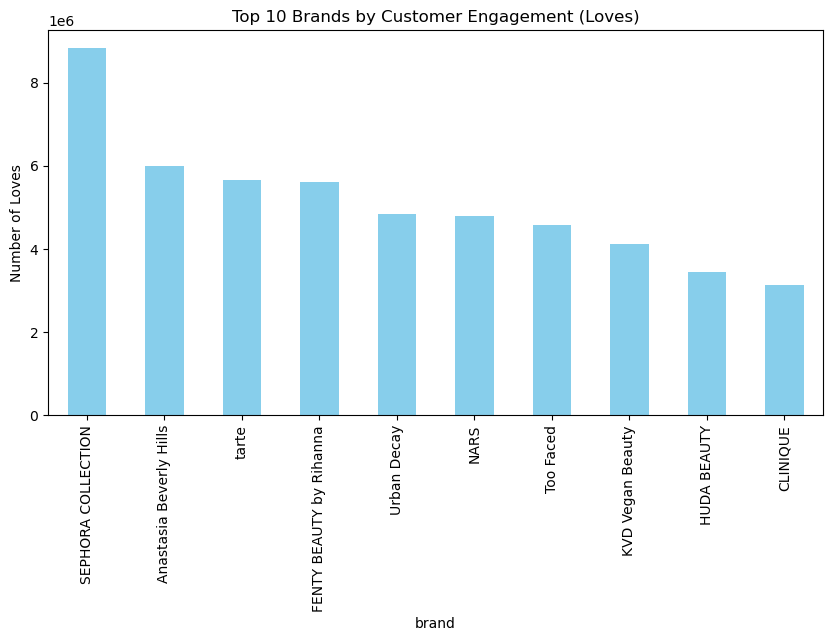

In [51]:
top_brands_by_engagement['love'].plot(kind='bar', figsize=(10, 5), color='skyblue', title='Top 10 Brands by Customer Engagement (Loves)')
plt.ylabel('Number of Loves')
plt.show()